In [1]:
#include <TFile.h>
#include <TH2D.h>
#include <TTree.h>
#include <TCanvas.h>
#include <TMath.h>
#include <iostream>

In [2]:
using std::cout;
using std::endl;

In [3]:
TFile* file0 = TFile::Open("DY_DUMP_4pi_GMC_Jan08_LD2.root", "READ");
TTree* tree0 = (TTree*)file0->Get("result_mc");

In [4]:
gStyle->SetOptFit(1011);

In [5]:
double PI = TMath::Pi();

int phi_bins = 20;
int costh_bins = 20;

In [6]:
TF2* fit2D = new TF2("fit2D", "[0] * ( 1 + [1]*y*y + 2*[2]*sqrt(1-y*y)*y*cos(x) + [3]*(1-y*y)*cos(2*x)/2.) ",
                     PI, PI, -1.0, 1.0);

fit2D->SetParNames("A", "#lambda","#mu","#nu");

In [7]:
TCanvas* can = new TCanvas("can", "can", 600, 600);

In [8]:
TH2D* phi_costh_mc = new TH2D("phi_costh_mc", "; phi_cs [rad]; costh_cs", phi_bins, -PI, PI, costh_bins, -1.0, 1.0);
tree0->Project("phi_costh_mc", "true_costh:true_phi", "(4.5 < true_mass && true_mass < 8.0)* weight");

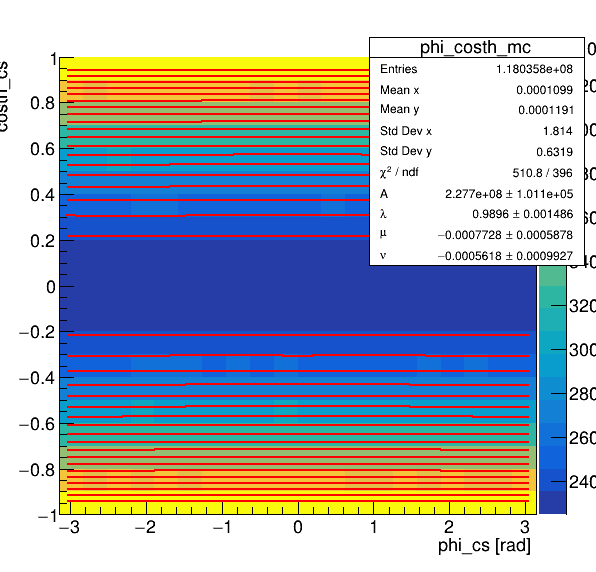

 FCN=510.827 FROM MIGRAD    STATUS=CONVERGED     289 CALLS         290 TOTAL
                     EDM=3.73607e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            2.27672e+08   1.01105e+05  -6.69051e+01  -7.03720e-13
   2  #lambda      9.89644e-01   1.48605e-03  -4.22626e-08   2.48376e-03
   3  #mu         -7.72770e-04   5.87807e-04   4.49225e-07   1.11872e-04
   4  #nu         -5.61770e-04   9.92732e-04   6.23754e-07   3.46177e-05


Info in <TCanvas::Print>: png file imgs/phi_costh_mc.png has been created


In [9]:
phi_costh_mc->Draw("COLZ");
phi_costh_mc->Fit("fit2D");
can->SaveAs("imgs/phi_costh_mc.png");
can->Draw();

In [10]:
TH2D* phi_costh = new TH2D("phi_costh", "; phi_cs [rad]; costh_cs", phi_bins, -PI, PI, costh_bins, -1.0, 1.0);
tree0->Project("phi_costh", "costh:phi", "(fpga1==1 && mass > 0.0 && 4.5 < true_mass && true_mass < 8.0)* weight");

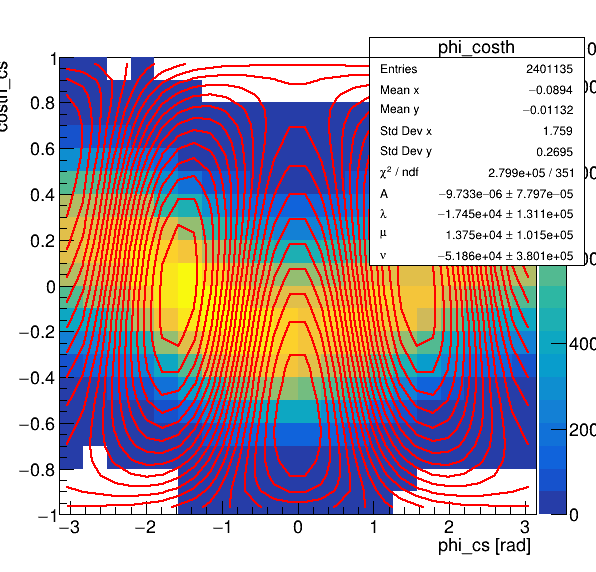

 FCN=279859 FROM MIGRAD    STATUS=CALL LIMIT   1482 CALLS        1483 TOTAL
                     EDM=4.19128e-05    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A           -9.73325e-06   7.79737e-05   4.61185e-07   1.63830e+03
   2  #lambda     -1.74546e+04   1.31064e+05  -7.60013e+02  -6.07702e-05
   3  #mu          1.37462e+04   1.01513e+05   5.49066e+02  -1.40689e-04
   4  #nu         -5.18572e+04   3.80109e+05  -1.83294e+03  -1.65335e-05


Warning in <Fit>: Abnormal termination of minimization.
Info in <TCanvas::Print>: png file imgs/phi_costh.png has been created


In [11]:
phi_costh->Draw("COLZ");
phi_costh->Fit("fit2D");
can->SaveAs("imgs/phi_costh.png");
can->Draw();